Análisis Exploratorio de Datos

1. Conexión a Snowflake con Python e imports de librerías necesarias

In [1]:
from os import getenv
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
config_snowflake = {
    'user': getenv('SNOW_USER'),
    'password': getenv('SNOW_PASSWORD'),
    'account': getenv('SNOW_ACCOUNT'),
    'schema': 'RAW',
    'database': 'INSTACART_DB',}
snowflakecnx = snowflake.connector.connect(**config_snowflake)
snowflakecursor = snowflakecnx.cursor()
print('Conexión a Snowflake exitosa')
    

Conexión a Snowflake exitosa


2. Dimensiones de los datos de cada tabla del SCHEMA RAW

Visualización de un dato de cada tabla

In [3]:

snowflakecursor.execute("SELECT * FROM aisles limit 1")
dato_aisles = pd.DataFrame(snowflakecursor.fetchall(), columns=[x[0] for x in snowflakecursor.description])
print("Aisles")
print(dato_aisles.to_string(index=False))
print()
snowflakecursor.execute("SELECT * FROM departments limit 1")
dato_departments = pd.DataFrame(snowflakecursor.fetchall(), columns=[x[0] for x in snowflakecursor.description])
print("Departments")
print(dato_departments.to_string(index=False))
print()
snowflakecursor.execute("SELECT * FROM products limit 1")
dato_products = pd.DataFrame(snowflakecursor.fetchall(), columns=[x[0] for x in snowflakecursor.description])
print("Products")
print(dato_products.to_string(index=False))
print()
snowflakecursor.execute("SELECT * FROM order_products limit 1")
dato_order_products= pd.DataFrame(snowflakecursor.fetchall(), columns=[x[0] for x in snowflakecursor.description])
print("Order Products")
print(dato_order_products.to_string(index=False))
print()
snowflakecursor.execute("SELECT * FROM instacart_orders limit 1")
dato_instacart_orders = pd.DataFrame(snowflakecursor.fetchall(), columns=[x[0] for x in snowflakecursor.description])
print("Instacart Orders")
print(dato_instacart_orders.to_string(index=False))

Aisles
 AISLE_ID                 AISLE
        1 prepared soups salads

Departments
 DEPARTMENT_ID DEPARTMENT
             1     frozen

Products
 PRODUCT_ID               PRODUCT_NAME  AISLE_ID  DEPARTMENT_ID
          1 Chocolate Sandwich Cookies        61             19

Order Products
 ORDER_ID  PRODUCT_ID  ADD_TO_CART_ORDER  REORDERED
        4       10054                5.0          1

Instacart Orders
 ID  ORDER_ID  USER_ID  ORDER_NUMBER  ORDER_DOW  ORDER_HOUR_OF_DAY  DAYS_SINCE_PRIOR_ORDER
  1   1515936   183418            11          6                 13                    30.0


Resumen de cada tabla

In [4]:
snowflakecursor.execute("SELECT * FROM aisles")
all_aisles = snowflakecursor.fetchall()
aisles = pd.DataFrame(all_aisles, columns=['aisle_id', 'aisle'])
print("Aisles")
aisles.info(memory_usage='deep')
aisles.memory_usage(deep=True).sum()/(1024**2)
print()
snowflakecursor.execute("SELECT * FROM departments")
all_departments = snowflakecursor.fetchall()
departments = pd.DataFrame(all_departments, columns=['department_id', 'department'])
print("Departments")
departments.info(memory_usage='deep')
departments.memory_usage(deep=True).sum()/(1024**2)
print()
snowflakecursor.execute("SELECT * FROM products")
all_products = snowflakecursor.fetchall()
products = pd.DataFrame(all_products, columns=['product_id', 'product_name', 'aisle_id', 'department_id'])
print("Products")
products.info(memory_usage='deep')
products.memory_usage(deep=True).sum()/(1024**2)
print()
snowflakecursor.execute("SELECT * FROM order_products")
all_order_products = snowflakecursor.fetchall()
order_products = pd.DataFrame(all_order_products, columns=['order_id', 'product_id', 'add_to_cart_order', 'reordered'])
print("Order Products")
order_products.info(memory_usage='deep')
order_products.memory_usage(deep=True).sum()/(1024**2)
print()
snowflakecursor.execute("SELECT * FROM instacart_orders")
all_instacart_orders = snowflakecursor.fetchall()
instacart_orders = pd.DataFrame(all_instacart_orders, columns=['id','order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'])
print("Instacart Orders")
instacart_orders.info(memory_usage='deep')
instacart_orders.memory_usage(deep=True).sum()/(1024**2)


Aisles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.6 KB

Departments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6 KB

Products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id

25.579723358154297

Número de columnas de cada tabla

In [5]:

no_atr_aisles = len(aisles.columns)
no_atr_departments = len(departments.columns)
no_atr_products = len(products.columns)
no_atr_order_products = len(order_products.columns)
no_atr_instacart_orders = len(instacart_orders.columns)
#Mostrar los resultados en una tabla de pandas
data = {'No. de atributos': [no_atr_aisles, no_atr_departments, no_atr_products, no_atr_order_products, no_atr_instacart_orders]}
df = pd.DataFrame(data, index=['aisles', 'departments', 'products', 'order_products', 'instacart_orders'])
print(df)




                  No. de atributos
aisles                           2
departments                      2
products                         4
order_products                   4
instacart_orders                 7


Número de filas de cada tabla

In [6]:
no_aisles = len(aisles)
no_departments = len(departments)
no_products = len(products)
no_order_products = len(order_products)
no_instacart_orders = len(instacart_orders)
#Mostrar los resultados en una tabla de pandas
data = {'No. de registros': [no_aisles, no_departments, no_products, no_order_products, no_instacart_orders]}
df = pd.DataFrame(data, index=['aisles', 'departments', 'products', 'order_products', 'instacart_orders'])
print(df)

                  No. de registros
aisles                         134
departments                     21
products                     49694
order_products             4545007
instacart_orders            478967


3. Estadísticos descrriptivos básicos
Se aplicarán estas medidas únicamente para atributos de tablas con valores numéricos relevantes; es decir, se omiten los IDs para esta sección. Los atributos relevantes son: add_to_cart_order, reordered, order_dow, days_since_prior_order,order_hour_of_day

Valores únicos

In [7]:
#Valores únicos de cada atributo y valor que toman
#Add_to_cart_order
print("Valores únicos de add_to_cart_order")
order_products_add_to_cart_order_unique = order_products['add_to_cart_order'].unique()
print(sorted(order_products_add_to_cart_order_unique))
print("Cantidad de valores únicos de add_to_cart_order: ", len(order_products_add_to_cart_order_unique))
print()
#Reordered
print("Valores únicos de reordered")
order_products_reordered_unique = order_products['reordered'].unique()
print(sorted(order_products_reordered_unique))
print("Cantidad de valores únicos de reordered: ", len(order_products_reordered_unique))
print()
#Order_dow
print("Valores únicos de order_dow")
instacart_orders_order_dow_unique = instacart_orders['order_dow'].unique()
print(sorted(instacart_orders_order_dow_unique))
print("Cantidad de valores únicos de order_dow: ", len(instacart_orders_order_dow_unique))
print()
#Order_hour_of_day
print("Valores únicos de order_hour_of_day")
instacart_orders_order_hour_of_day_unique = instacart_orders['order_hour_of_day'].unique()
print(sorted(instacart_orders_order_hour_of_day_unique))
print("Cantidad de valores únicos de order_hour_of_day: ", len(instacart_orders_order_hour_of_day_unique))
print()
#Days_since_prior_order
print("Valores únicos de days_since_prior_order")
instacart_orders_days_since_prior_order_unique = instacart_orders['days_since_prior_order'].unique()
print(sorted(instacart_orders_days_since_prior_order_unique))
print("Cantidad de valores únicos de days_since_prior_order: ", len(instacart_orders_days_since_prior_order_unique))
print()

Valores únicos de add_to_cart_order
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, nan]
Cantidad de valores únicos de add_to_cart_order:  65

Valores únicos de reordered
[0, 1]
Cantidad de valores únicos de reordered:  2

Valores únicos de order_dow
[0, 1, 2, 3, 4, 5, 6]
Cantidad de valores únicos de order_dow:  7

Valores únicos de order_hour_of_day
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Cantidad de valores únicos de order_hour_of_day:  24

Valores únicos de days_since_prior_order
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 2

Promedio, Mediana, Moda, Varianza y Desviación Estándar (varianza y desviación estándar calculadas para la población) e histograma
Se utilizo los resultados de valores únicos para saber la longitud del histograma

In [8]:
#Add_to_cart_order
promedio_add_to_cart_order = order_products['add_to_cart_order'].mean()
mediana_add_to_cart_order = order_products['add_to_cart_order'].median()
moda_add_to_cart_order = order_products['add_to_cart_order'].mode()
varianza_pob_add_to_cart_order = order_products['add_to_cart_order'].var(ddof=0)#ddof=0 poblacional para que 
#la varianza sea dividida por n en lugar de n-1
desviacion_add_to_cart_order = order_products['add_to_cart_order'].std(ddof=0)#ddof=0 poblacional para que
#la desviación estandar sea dividida por n en lugar de n-1

print("Promedio de add_to_cart_order: ", promedio_add_to_cart_order)
print("Mediana de add_to_cart_order: ", mediana_add_to_cart_order)
print("Moda de add_to_cart_order: ", moda_add_to_cart_order[0], " con ", order_products['add_to_cart_order'].value_counts()[moda_add_to_cart_order[0]], " repeticiones")
print("Varianza poblacional de add_to_cart_order: ", varianza_pob_add_to_cart_order)
print("Desviación estándar de add_to_cart_order: ", desviacion_add_to_cart_order)




Promedio de add_to_cart_order:  8.351669424412066
Mediana de add_to_cart_order:  6.0
Moda de add_to_cart_order:  1.0  con  450046  repeticiones
Varianza poblacional de add_to_cart_order:  50.1315954181733
Desviación estándar de add_to_cart_order:  7.0803668985564086


In [9]:
#Reordered, solo se calcula la moda debido a que es una variable categórica
moda_reordered = order_products['reordered'].mode()
print("Moda de reordered: ", moda_reordered[0], " con ", order_products['reordered'].value_counts()[moda_reordered[0]], " repeticiones")

Moda de reordered:  1  con  2683838  repeticiones


In [10]:
#Order_dow
promedio_order_dow = instacart_orders['order_dow'].mean()
mediana_order_dow = instacart_orders['order_dow'].median()
moda_order_dow = instacart_orders['order_dow'].mode()
varianza_pob_order_dow = instacart_orders['order_dow'].var(ddof=0)
desviacion_order_dow = instacart_orders['order_dow'].std(ddof=0)

print("Promedio de order_dow: ", promedio_order_dow)
print("Mediana de order_dow: ", mediana_order_dow)
print("Moda de order_dow: ", moda_order_dow[0], " con ", instacart_orders['order_dow'].value_counts()[moda_order_dow[0]], " repeticiones")
print("Varianza poblacional de order_dow: ", varianza_pob_order_dow)
print("Desviación estándar de order_dow: ", desviacion_order_dow)



Promedio de order_dow:  2.775057571816012
Mediana de order_dow:  3.0
Moda de order_dow:  0  con  84090  repeticiones
Varianza poblacional de order_dow:  4.185571663157289
Desviación estándar de order_dow:  2.045866971031423


In [11]:
#Order_hour_of_day
promedio_order_hour_of_day = instacart_orders['order_hour_of_day'].mean()
mediana_order_hour_of_day = instacart_orders['order_hour_of_day'].median()
moda_order_hour_of_day = instacart_orders['order_hour_of_day'].mode()
varianza_pob_order_hour_of_day = instacart_orders['order_hour_of_day'].var(ddof=0)
desviacion_order_hour_of_day = instacart_orders['order_hour_of_day'].std(ddof=0)

print("Promedio de order_hour_of_day: ", promedio_order_hour_of_day)
print("Mediana de order_hour_of_day: ", mediana_order_hour_of_day)
print("Moda de order_hour_of_day: ", moda_order_hour_of_day[0], " con ", instacart_orders['order_hour_of_day'].value_counts()[moda_order_hour_of_day[0]], " repeticiones")
print("Varianza poblacional de order_hour_of_day: ", varianza_pob_order_hour_of_day)
print("Desviación estándar de order_hour_of_day: ", desviacion_order_hour_of_day)

Promedio de order_hour_of_day:  13.446675867022154
Mediana de order_hour_of_day:  13.0
Moda de order_hour_of_day:  10  con  40578  repeticiones
Varianza poblacional de order_hour_of_day:  17.85046949994818
Desviación estándar de order_hour_of_day:  4.224981597586926


In [12]:
#Days_since_prior_order
promedio_days_since_prior_order = instacart_orders['days_since_prior_order'].mean()
mediana_days_since_prior_order = instacart_orders['days_since_prior_order'].median()
moda_days_since_prior_order = instacart_orders['days_since_prior_order'].mode()
varianza_pob_days_since_prior_order = instacart_orders['days_since_prior_order'].var(ddof=0)
desviacion_days_since_prior_order = instacart_orders['days_since_prior_order'].std(ddof=0)

print("Promedio de days_since_prior_order: ", promedio_days_since_prior_order)
print("Mediana de days_since_prior_order: ", mediana_days_since_prior_order)
print("Moda de days_since_prior_order: ", moda_days_since_prior_order[0], " con ", instacart_orders['days_since_prior_order'].value_counts()[moda_days_since_prior_order[0]], " repeticiones")
print("Varianza poblacional de days_since_prior_order: ", varianza_pob_days_since_prior_order)
print("Desviación estándar de days_since_prior_order: ", desviacion_days_since_prior_order)


Promedio de days_since_prior_order:  11.101750979677794
Mediana de days_since_prior_order:  7.0
Moda de days_since_prior_order:  30.0  con  51338  repeticiones
Varianza poblacional de days_since_prior_order:  84.45544687497849
Desviación estándar de days_since_prior_order:  9.189964465381708


Histogramas

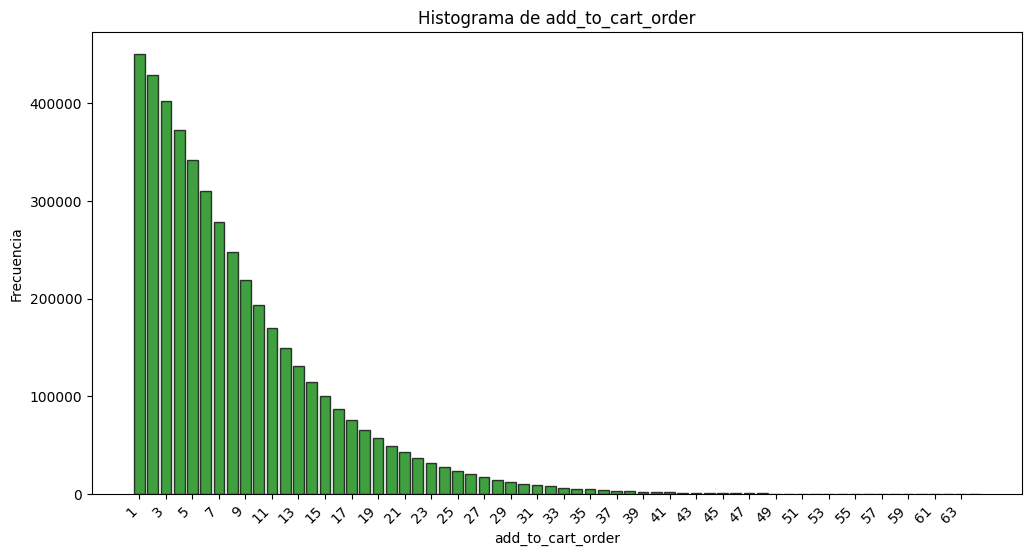

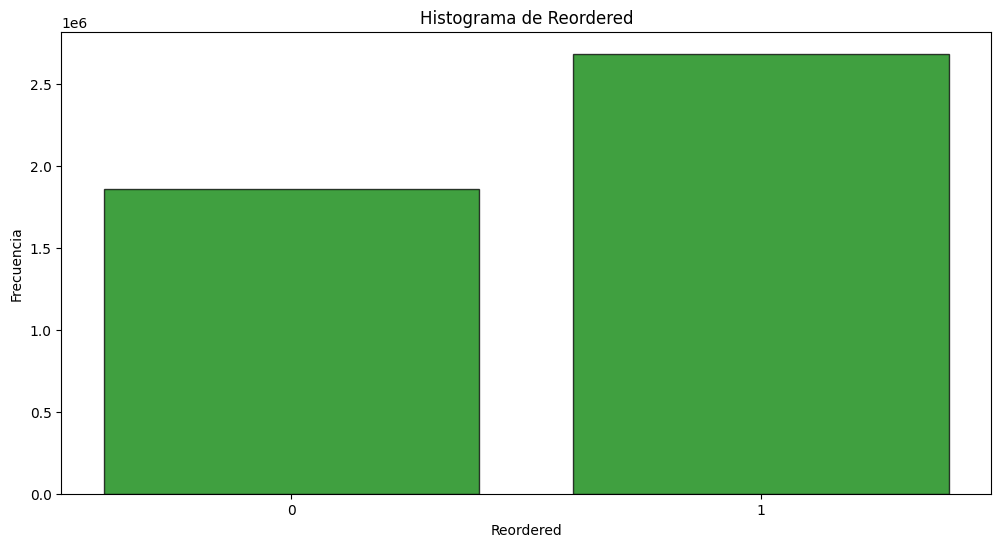

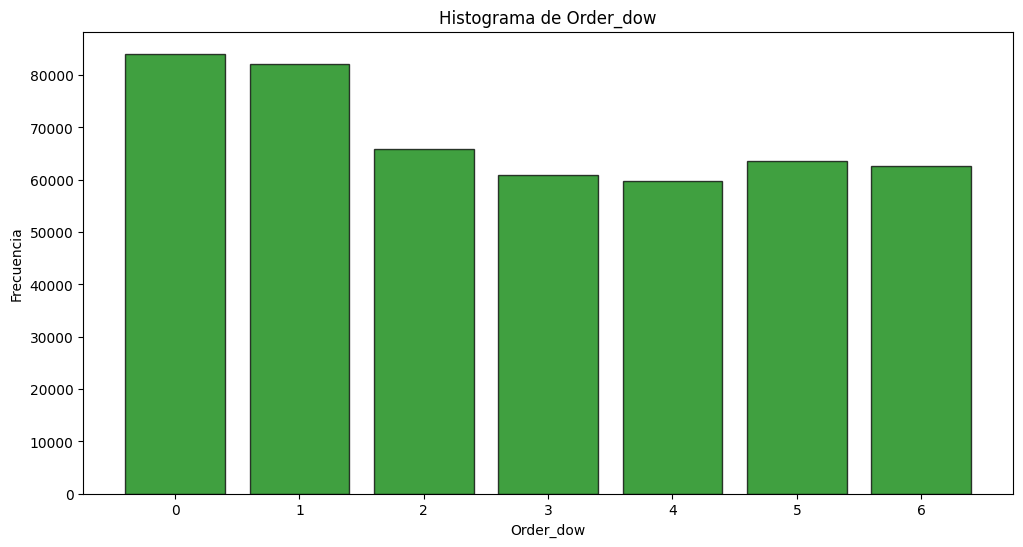

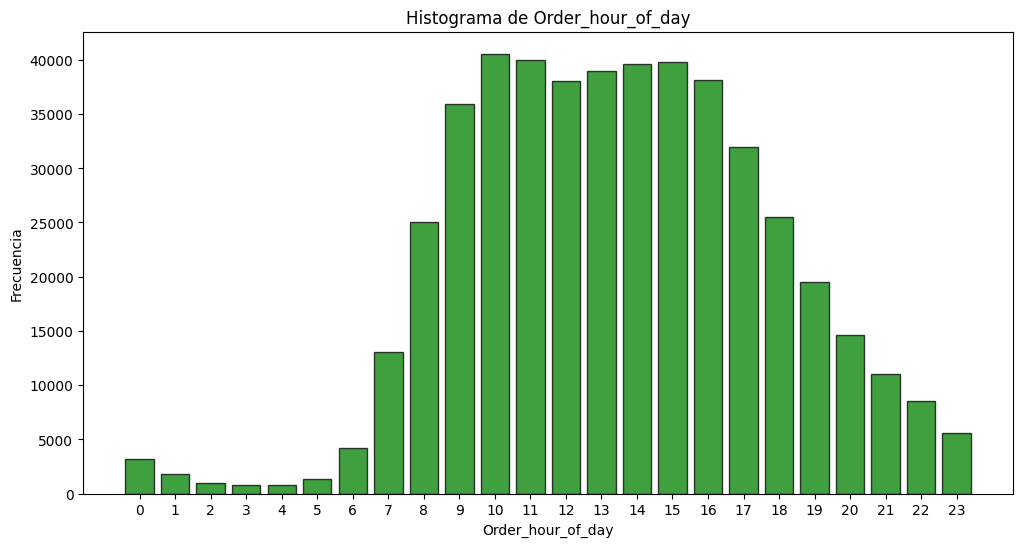

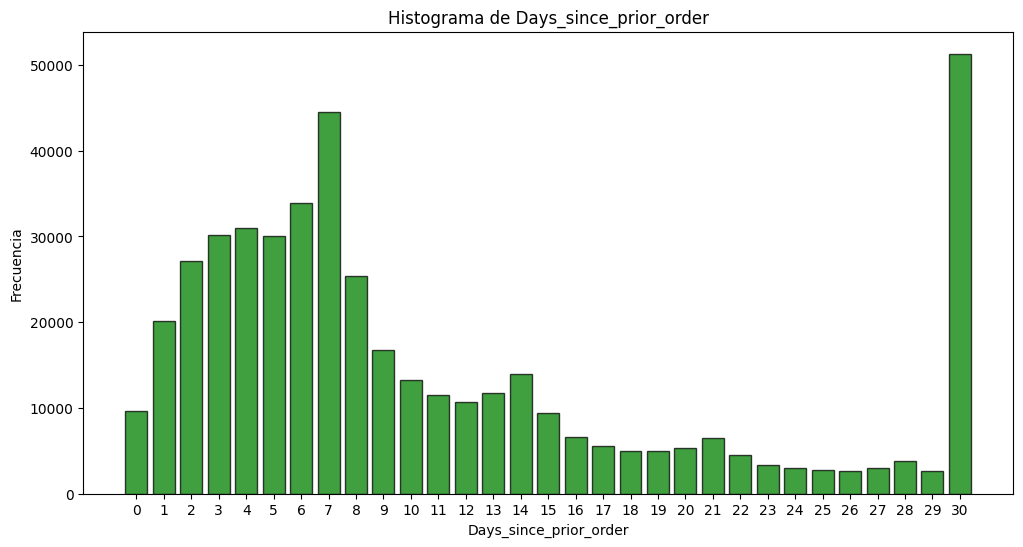

In [13]:
#Add_to_cart_order
# Contar la frecuencia de cada categoría
add_to_cart_order_counts = order_products['add_to_cart_order'].value_counts().sort_index()

# Graficar el histograma
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
plt.bar(add_to_cart_order_counts.index, add_to_cart_order_counts.values, color='green', alpha=0.75, edgecolor='black')

# Ajustar los ticks del eje X
plt.xticks(add_to_cart_order_counts.index[::2], rotation=45, ha='right')  # Mostrar solo cada 10 valores y rotarlos
# Etiquetas y título
plt.xlabel('add_to_cart_order')
plt.ylabel('Frecuencia')
plt.title('Histograma de add_to_cart_order')

#Reordered
reordered_counts = order_products['reordered'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(reordered_counts.index, reordered_counts.values, color='g', alpha=0.75, edgecolor='black')
plt.xticks(reordered_counts.index) 
plt.xlabel('Reordered')
plt.ylabel('Frecuencia')
plt.title('Histograma de Reordered')

#Order_dow
order_dow_counts = instacart_orders['order_dow'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(order_dow_counts.index, order_dow_counts.values, color='g', alpha=0.75, edgecolor='black')
plt.xticks(order_dow_counts.index)
plt.xlabel('Order_dow')
plt.ylabel('Frecuencia')
plt.title('Histograma de Order_dow')

#Order_hour_of_day
order_hour_of_day_counts = instacart_orders['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(order_hour_of_day_counts.index, order_hour_of_day_counts.values, color='g', alpha=0.75, edgecolor='black')
plt.xticks(order_hour_of_day_counts.index)
plt.xlabel('Order_hour_of_day')
plt.ylabel('Frecuencia')
plt.title('Histograma de Order_hour_of_day')
plt.show()

#Days_since_prior_order
days_since_prior_order_counts = instacart_orders['days_since_prior_order'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(days_since_prior_order_counts.index, days_since_prior_order_counts.values, color='g', alpha=0.75, edgecolor='black')
plt.xticks(days_since_prior_order_counts.index)
plt.xlabel('Days_since_prior_order')
plt.ylabel('Frecuencia')
plt.title('Histograma de Days_since_prior_order')
plt.show()

4. Problemas de calidad

Valores ausentes (visualizados en el resumen de los dataframes), pero confirmados con búsquedas concretas

In [14]:
def ver_ausentes(df):
    nulos=df.isnull().sum()
    print("Atributos con valores nulos")
    print(nulos)

    print()

In [15]:
#Verificar valores ausentes o vacíos
print("Aisles")
ver_ausentes(aisles)
print("Departments")
ver_ausentes(departments)
print("Products")
ver_ausentes(products)
print("Order Products")
ver_ausentes(order_products)
print("Instacart Orders")
ver_ausentes(instacart_orders)

Aisles
Atributos con valores nulos
aisle_id    0
aisle       0
dtype: int64

Departments
Atributos con valores nulos
department_id    0
department       0
dtype: int64

Products
Atributos con valores nulos
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Order Products
Atributos con valores nulos
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

Instacart Orders
Atributos con valores nulos
id                            0
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64



In [16]:
#Análisis de valores nulos en tabla products
print("Valores nulos en tabla products")
productos_nombres_nulos = products[products['product_name'].isnull()]
productos_nombres_nulos.head()

Valores nulos en tabla products


,product_id,product_name,aisle_id,department_id
37,38,None,100,21
71,72,None,100,21
109,110,None,100,21
296,297,None,100,21
416,417,None,100,21


Como parece existir una coincidencia en aisle_id y department_id se buscan posibles valores que no tengan aisle_id 100 y department_id 21

In [17]:
productos_no_iguales=productos_nombres_nulos = productos_nombres_nulos[(productos_nombres_nulos['aisle_id']!=100) | (productos_nombres_nulos['department_id']!=21)]
print("Productos con aisle_id y department_id diferentes de 100 y 21")
productos_no_iguales.head()

Productos con aisle_id y department_id diferentes de 100 y 21


,product_id,product_name,aisle_id,department_id


Al no existir más productos con nombre nulo se analiza el id del departamento y el aisle para tener más contexto

In [18]:
aisles_100 = aisles[aisles['aisle_id']==100]
departments_21 = departments[departments['department_id']==21]
print("Aisle 100")
print(aisles_100)
print("Department 21")
print(departments_21)

Aisle 100
    aisle_id    aisle
99       100  missing
Department 21
    department_id department
20             21    missing


Ambos ids corresponden a missing, por lo que tiene sentido el valor nulo del producto. Sin embargo, se va a cambiar el nombre a Unknown Product para evitar dejar nulos

In [19]:
#Análisis de valores nulos en tabla order_products
print("Valores nulos en tabla order_products")
order_products_nulos = order_products[order_products['add_to_cart_order'].isnull()]
order_products_nulos.head()

Valores nulos en tabla order_products


,order_id,product_id,add_to_cart_order,reordered
12802,9310,25753,NaN,0
82485,61355,1087,NaN,0
82487,61355,1203,NaN,0
82489,61355,1700,NaN,0
82492,61355,3390,NaN,0


Se verifica si hay casos en donde reordered es diferente de 0 para los valores nulos.

In [20]:
reordered_no_cero=order_products_nulos[(order_products_nulos['reordered']!=0)]
reordered_no_cero.head()

,order_id,product_id,add_to_cart_order,reordered
227256,171934,18095,NaN,1
227259,171934,18479,NaN,1
227277,171934,26032,NaN,1
346750,264710,1143,NaN,1
346770,264710,14947,NaN,1


Por el título del atributo se supone que esos productos fueron añadidos simultaneamente con otros. Por lo que se puede reemplazar el valor con un 1, dando a entender que los productos fueron añadidos a la vez (tienen el mayor orden en el carrito). Para confirmar la suposición se valida que no existan ordenes del mismo order_id con add_to_cart_order iguales pero product_id_diferentes.

In [21]:
#Ordenes con add_to_cart_order iguales, order_id iguales y product_id diferentes
order_products_orden = order_products[order_products.duplicated(['add_to_cart_order', 'order_id'], keep=False)]
order_products_orden.head()

,order_id,product_id,add_to_cart_order,reordered
82485,61355,1087,NaN,0
82487,61355,1203,NaN,0
82489,61355,1700,NaN,0
82492,61355,3390,NaN,0
82496,61355,4781,NaN,0


Aparentemente son nulos, finalmente se valida que todos los resultados de esta comparación sean efectivamente nulos para dar la suposición por válida.

In [22]:
order_products_orden_no_nulos = order_products_orden[order_products_orden['add_to_cart_order'].notnull()]
order_products_orden_no_nulos.head()

,order_id,product_id,add_to_cart_order,reordered


Entonces, para el caso de add_to_cart_order se cambiarán los nulos por 1 en base a la suposición de adiciones simultaneas al carrito.

In [23]:
#Análisis de valores nulos en tabla instacart_orders
print("Valores nulos en tabla instacart_orders")
instacart_orders_nulos = instacart_orders[instacart_orders['days_since_prior_order'].isnull()]
instacart_orders_nulos.head()

Valores nulos en tabla instacart_orders


,id,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,29,133707,182261,1,3,10,NaN
96,97,787445,25685,1,6,18,NaN
100,101,294410,111449,1,0,19,NaN
103,104,2869915,123958,1,4,16,NaN
104,105,2521921,42286,1,3,18,NaN


Aparentemente, el NaN es debido a que es su primera orden y no tiene ordenes previas. Como en los valores únicos de days_since_prior_order existe el 0 (ha comprado ese mismo día más productos), se puede cambiar el valor nulo por un -1 dando a entender este comportamiento de primera compra. Se valida que el número de orden sea 1 para todos los casos para verificar la suposición.

In [24]:
instacart_orders_no_primeras=instacart_orders_nulos[(instacart_orders_nulos['order_number']!=1)]
instacart_orders_no_primeras.head()

,id,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Por el resultado, la solución va a ser tratar estos NaN y convertirlos en -1.

Valores duplicados (toda la consulta de una fila es exactamente la misma o mismas claves primarias). Finalmente se verifica si es una duplicación completa de la fila o solo de los ids

In [25]:
#Tabla aisles
duplicados=aisles.duplicated().sum()
print("Número de filas duplicadas en aisles")
print(duplicados)
print()
ids_duplicados=aisles['aisle_id'].duplicated().sum()
print("Número de ids duplicados en aisles")
print(ids_duplicados)

Número de filas duplicadas en aisles
0

Número de ids duplicados en aisles
0


In [26]:
#Tabla departments
duplicados=departments.duplicated().sum()
print("Número de filas duplicadas en departments")
print(duplicados)
print()
ids_duplicados=departments['department_id'].duplicated().sum()
print("Número de ids duplicados en departments")
print(ids_duplicados)

Número de filas duplicadas en departments
0

Número de ids duplicados en departments
0


In [27]:
#Tabla products
duplicados=products.duplicated().sum()
print("Número de filas duplicadas en products")
print(duplicados)
print()
ids_duplicados=products['product_id'].duplicated().sum()
print("Número de ids duplicados en products")
print(ids_duplicados)


Número de filas duplicadas en products
0

Número de ids duplicados en products
0


In [28]:
#Tabla order_products
duplicados=order_products.duplicated().sum()
print("Número de filas duplicadas en order_products")
print(duplicados)
print()
#Order product se define por una tupla de id de orden y id de producto
ids_duplicados=order_products.duplicated(subset=['order_id', 'product_id']).sum()
print("Número de ids duplicados en order_products")
print(ids_duplicados)

Número de filas duplicadas en order_products
0

Número de ids duplicados en order_products
0


In [29]:

#Tabla instacart_orders, se generó un id extra porque si existían filas duplicadas, 
#para el analisis de duplicados se omitirá el id generado de la columna 'id'
duplicados=instacart_orders[['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']].duplicated().sum()
print("Número de filas duplicadas en instacart_orders")
print(duplicados)
print()
#Se ve si la duplicación es solo de los ids o también del resto de los atributos
ids_duplicados = instacart_orders.duplicated(subset=['order_id', 'user_id']).sum()
print("Número de ids duplicados en instacart_orders")
print(ids_duplicados)



Número de filas duplicadas en instacart_orders
15

Número de ids duplicados en instacart_orders
15


Solo se encontraron ids duplicados en instacart_orders. Se procede a validar si los ids duplicados son los mismos u otras coincidencias respecto a los duplicados totales de filas de esa tabla.

In [30]:
no_ids_duplicados=0
print("Ids duplicados en instacart_orders que no son duplicados totales")
ids_duplicados=instacart_orders[instacart_orders.duplicated(subset=['order_id', 'user_id'])]
for id in ids_duplicados.iterrows():
    valor=[int(id[1]['order_id']), int(id[1]['user_id'])]

    #Validar en cada columna distinta de id si con el id actual hay duplicados
    duplicas=instacart_orders.loc[(instacart_orders['order_id'] == valor[0]) & (instacart_orders['user_id'] == valor[1])]
    #Si en los resultados de ids iguales, no hay duplica total, se muestra la fila
    #igualmente no se toma en cuenta el id generado del campo 'id'
    if duplicas[['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']].duplicated().sum()==0:
        print()
        print("Coincidencia de ids y distinta información")
        print(duplicas)
        no_ids_duplicados+=1
print()
print("Número de ids duplicados con distinta información")
print(no_ids_duplicados)
print()

Ids duplicados en instacart_orders que no son duplicados totales

Número de ids duplicados con distinta información
0



Como la duplicación es total (son copias exactas sin ninguna diferencia) el plan de acción será eliminar los duplicados de la tabla instacart_orders.

Inconsistencias de tipos

Análisis más profundo de valores únicos para ver si existe algún valor no entero en los atributos days_since_prior_order, order_dow que actualmente son tratados como float.


In [31]:
days_since_prior_order_int=instacart_orders_days_since_prior_order_unique.astype(int)
print("Valores no enteros en days_since_prior_order")
print(instacart_orders_days_since_prior_order_unique[instacart_orders_days_since_prior_order_unique!=days_since_prior_order_int])


Valores no enteros en days_since_prior_order
[nan]


C:\Users\erics\AppData\Local\Temp\ipykernel_27004\4213184591.py:1: RuntimeWarning: invalid value encountered in cast
  days_since_prior_order_int=instacart_orders_days_since_prior_order_unique.astype(int)


In [32]:
add_to_cart_order_int=order_products_add_to_cart_order_unique.astype(int)
print("Valores no enteros en add_to_cart_order")
print(order_products_add_to_cart_order_unique[order_products_add_to_cart_order_unique!=add_to_cart_order_int])

Valores no enteros en add_to_cart_order
[nan]


C:\Users\erics\AppData\Local\Temp\ipykernel_27004\3203115707.py:1: RuntimeWarning: invalid value encountered in cast
  add_to_cart_order_int=order_products_add_to_cart_order_unique.astype(int)


Como únicamente el valor NaN se reporto como valor diferente de entero (esto es normal debido a la definición de NaN), es necesaria la conversión de los valores de days_since_prior_order a enteros para evitar problemas en futuros cálculos. De igual manera, para order_dow se realizará la conversión a valores enteros al no encontrar ningún valor decimal que difiera de su conversión entera a excepción del NaN.

Como en la tabla de valores únicos de reordered únicamente se mostro el 0 y el 1, también será necesaria su conversión del atributo a un atributo boolean que no desperdicie la memoria de una variable int.


Necesaria la conversión de datos para:

Tabla instacart_orders: atributo days_since_prior_order debe ser int

Tabla order_products: atributo add_to_cart_order debe ser int

Tabla order_products: atributo reordered debe ser boolean

La conversión de datos se realizará después de la transformación y manejo de valores faltantes, los cuales serán del tipo de dato resultante después de la conversión final de los datos.

Datos inconsistentes: validar que order_dow en la tabla instacart orders solo tome valores enteros del 0 al 6. Y que order_hour_of_day de esa misma tabla solo tome valores del 0 al 23

In [33]:
print("Valores fuera de rango en order_dow")
print(instacart_orders_order_dow_unique[(instacart_orders_order_dow_unique<0) | (instacart_orders_order_dow_unique>6)])
print()
print("Valores fuera de rango en order_hour_of_day")
print(instacart_orders_order_hour_of_day_unique[(instacart_orders_order_hour_of_day_unique<0) | (instacart_orders_order_hour_of_day_unique>23)])
print()

Valores fuera de rango en order_dow
[]

Valores fuera de rango en order_hour_of_day
[]



No existen valores inconsistentes, por lo que no es encesaria ninguna acción en este apartado.

Plan de accción:

-Tabla products: cambiar los datos Nulos del atributo Product_Name a Unknown Product

-Tabla order_products: cambiar los datos nulos del atributo add_to_cart_order a 1.

cambiar el tipo de dato de add_to_cart_order a int y de reordered a boolean.


-Tabla instacart_orders: cambiar los datos nulos del atributo days_since_prior_order a -1.

cambiar el tipo de dato del atributo days_since_prior_order a int.

eliminar los duplicados.

eliminar la columna de id, que solo sirvió para traer la data total al schema RAW.

añadir la columna de fecha, que tome como dato la fecha actual de inserción de los datos de esta tabla.